In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [58]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df= pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [59]:
df["class"] =(df["class"] == "g").astype(int)

In [60]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


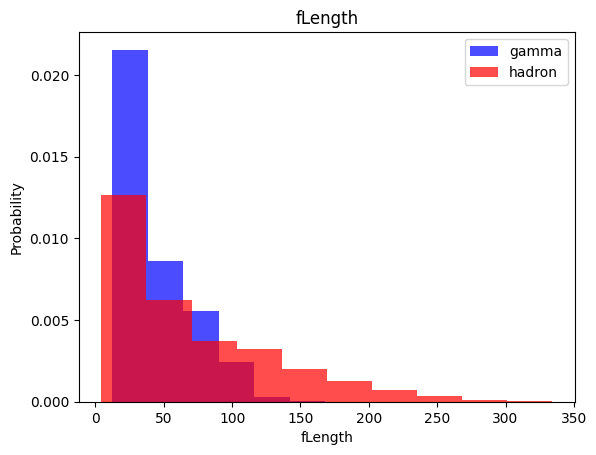

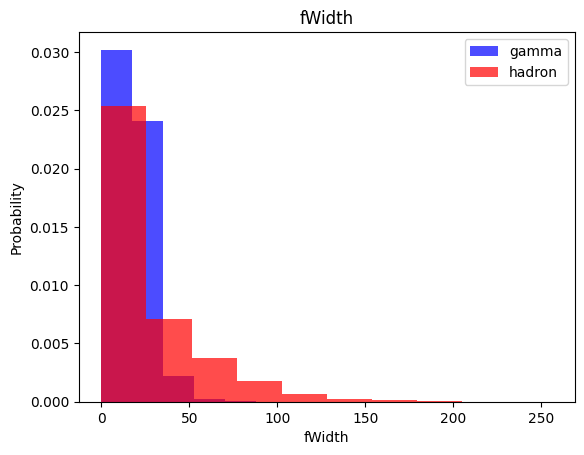

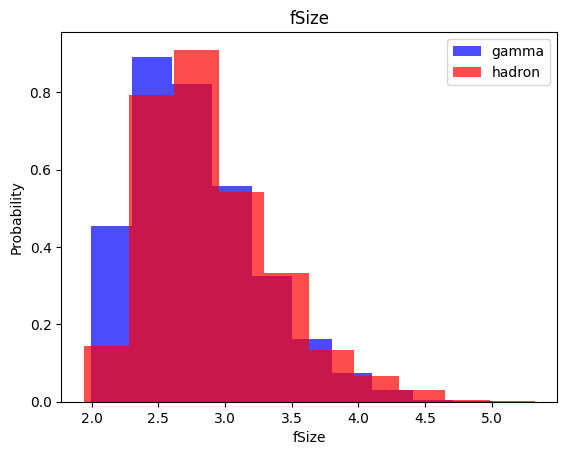

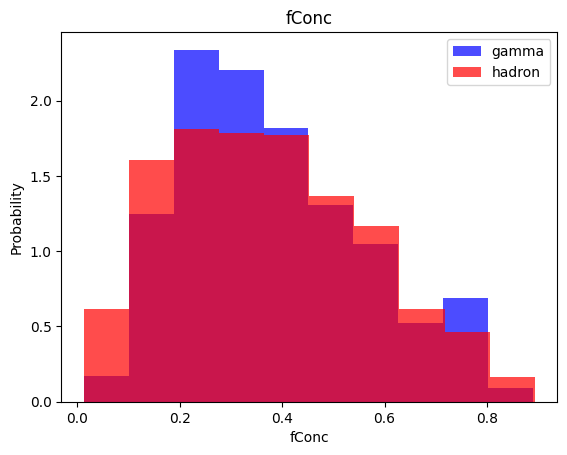

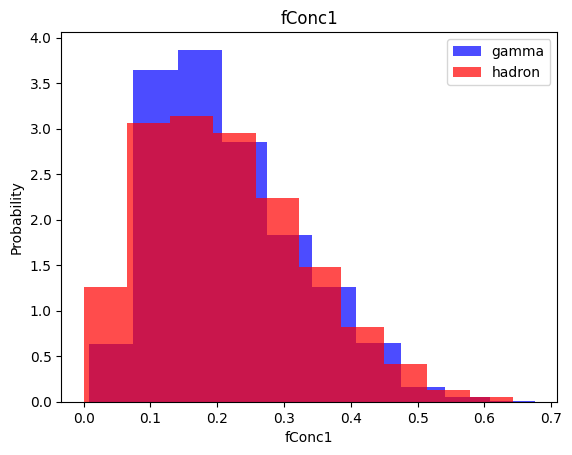

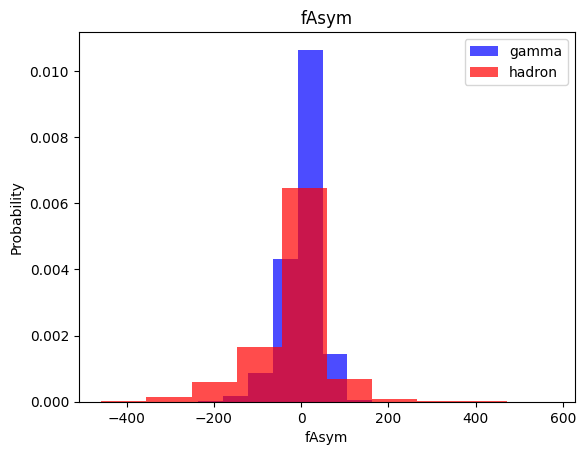

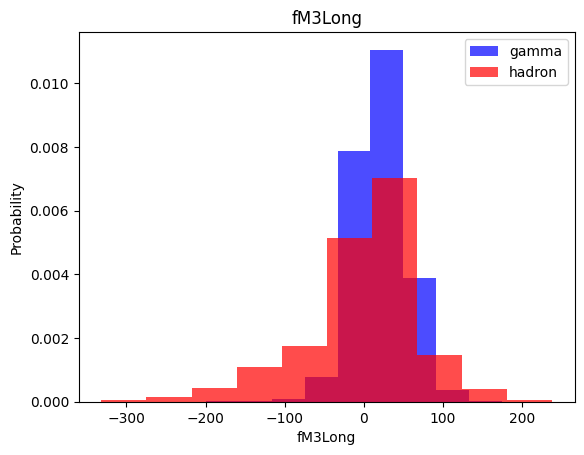

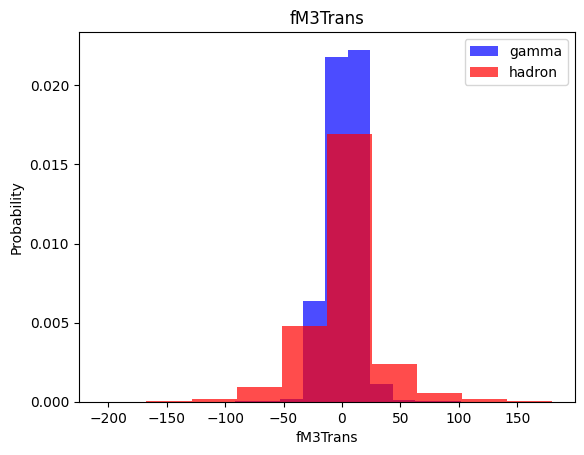

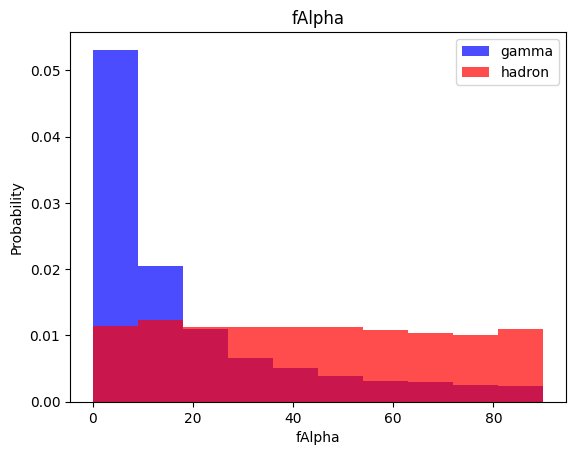

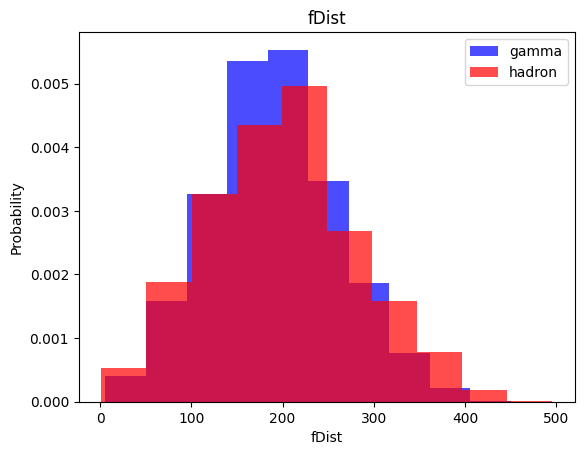

In [61]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label],color='red',label='hadron',alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train,validation,test datasets


In [62]:
train, valid , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

c:\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [63]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y 

In [64]:
#train
#print(len(train[train["class"]==1])) #gamma
#print(len(train[train["class"] == 0])) #hadron
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
# 如何快捷选择一行，复制一行，快捷选择一行中全部相同单词,多选单词（不同行）

KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
# support 数据样本

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1341
           1       0.85      0.86      0.86      2463

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)


In [70]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1341
           1       0.73      0.90      0.81      2463

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logisitic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

In [72]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [73]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1341
           1       0.84      0.82      0.83      2463

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



SVM

In [74]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1341
           1       0.89      0.90      0.89      2463

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Network

In [75]:
import tensorflow as tf 

In [76]:
def plot_loss(history):
    plt.plot(history.history['loss'],label = 'loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label = 'accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [77]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss= 'binary_crossentropy',metrics=['accuracy'])


c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
history = nn_model.fit(
    X_train, y_train, epochs=100,batch_size = 32,validation_split= 0.2
)

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7861 - loss: 0.4605 - val_accuracy: 0.6791 - val_loss: 0.5695
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.3673 - val_accuracy: 0.6899 - val_loss: 0.5884
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3500 - val_accuracy: 0.7574 - val_loss: 0.4861
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3396 - val_accuracy: 0.7794 - val_loss: 0.4367
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8617 - loss: 0.3318 - val_accuracy: 0.7598 - val_loss: 0.4709
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3256 - val_accuracy: 0.7402 - val_loss: 0.5217
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.3220 - val_accuracy: 0.7767 - val_loss: 0.4311
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.3174 - val_accu

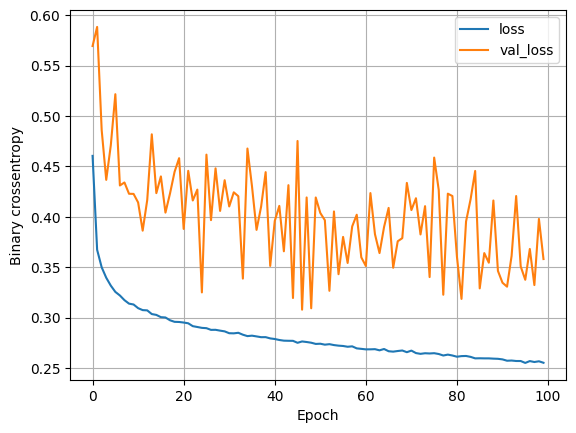

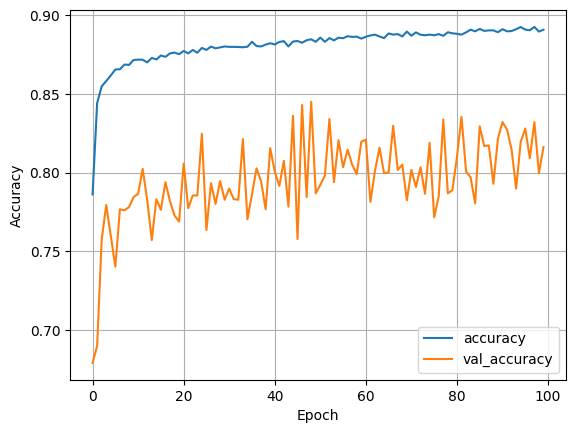

In [79]:
plot_loss(history)
plot_accuracy(history)